In [1]:
import numpy as np
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
import ModelFlare as mf

In [2]:
statsfiles = glob.glob('stats/stats*')
gaiafiles = glob.glob('stats/*gaia.csv')

In [3]:
stats = pd.DataFrame()
gaia = pd.DataFrame()

for i in statsfiles:
    df = pd.read_csv(i)
    stats = stats.append(df)

for i in gaiafiles:
    df = pd.read_csv(i)
    gaia = gaia.append(df)

statslim = stats.loc[((stats["chi_flare"] <= 100) & (stats['red_flare'] + 1 < stats['red_gauss']) & 
                      ((stats["ypos"] >= 10) | (stats['ypos'] < 3075)) & 
                      ((stats['end_time'] - stats['flare_time']) > 0.01) &
                      (stats['dof_flare'] > 15))]  

gaialim = gaia.loc[((gaia["chi_flare"].values.astype(np.float) <= 100) & (gaia['red_flare'].values.astype(np.float) + 1 < gaia['red_gauss'].values.astype(np.float)) & 
                    ((gaia["ypos"].values.astype(np.float) >= 10) | (gaia['ypos'].values.astype(np.float) < 3075)) & 
                    ((gaia['end_time'].values.astype(np.float) - gaia['flare_time'].values.astype(np.float)) > 0.01) &
                    (gaia['dof_flare'].values.astype(np.float) > 15))]
                    


In [4]:
#gaiasmall = gaia.loc[(gaia['id'] < 1000)]
gaiared = gaia[gaia['red_flare'].duplicated()]
gaiared_2 = gaiared[gaiared['red_flare'].duplicated()]
gaiared_3 = gaiared_2[gaiared_2['red_flare'].duplicated()]
gaiared_4 = gaiared_3[gaiared_3['red_flare'].duplicated()]
gaiared_5 = gaiared_4[gaiared_4['red_flare'].duplicated()]


gaiaid = gaia[gaia['id'].duplicated()]
gaiaid_2 = gaiaid[gaiaid['id'].duplicated()]
gaiaid_3 = gaiaid_2[gaiaid_2['id'].duplicated()]

(array([4., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([  252. ,  9009.6, 17767.2, 26524.8, 35282.4, 44040. , 52797.6,
        61555.2, 70312.8, 79070.4, 87828. ]),
 <a list of 10 Patch objects>)

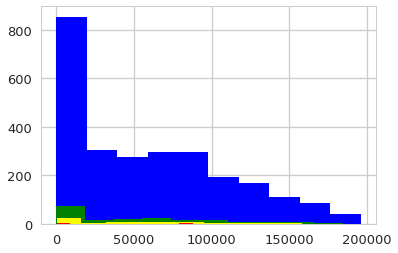

In [5]:
plt.hist(gaiared['id'] , color='blue')
plt.hist(gaiared_2['id'], color='green')
plt.hist(gaiared_3['id'], color='yellow')
plt.hist(gaiared_4['id'], color='red')
#plt.ylim(0,10)

In [6]:
six = len(gaiared_5['id'])
five = len(gaiared_4['id']) - len(gaiared_5['id'])
four = len(gaiared_3['id']) - len(gaiared_4['id'])
three= len(gaiared_2['id']) - len(gaiared_3['id'])
two= len(gaiared['id']) - len(gaiared_2['id'])
one= len(gaia['id']) - len(gaiared['id'] )

dup = [one, two, three, four, five, six]
print(dup)

[20917, 2438, 123, 54, 3, 3]


(0, 20)

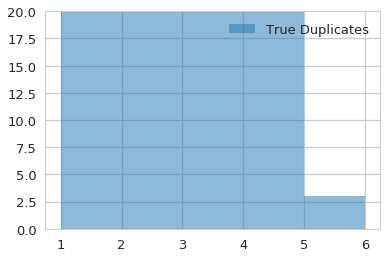

In [7]:
duplicates_gaia = gaia.pivot_table(index =['match_file', 'id'], aggfunc='size')
duplicates_gaia.values
plt.hist(duplicates_gaia.values, bins=5, alpha=.5, label='True Duplicates')
#plt.bar([1,2,3,4,5,6], dup, color='red', alpha=.5, label='By Flare Energy')
plt.legend()
plt.ylim(0,20)

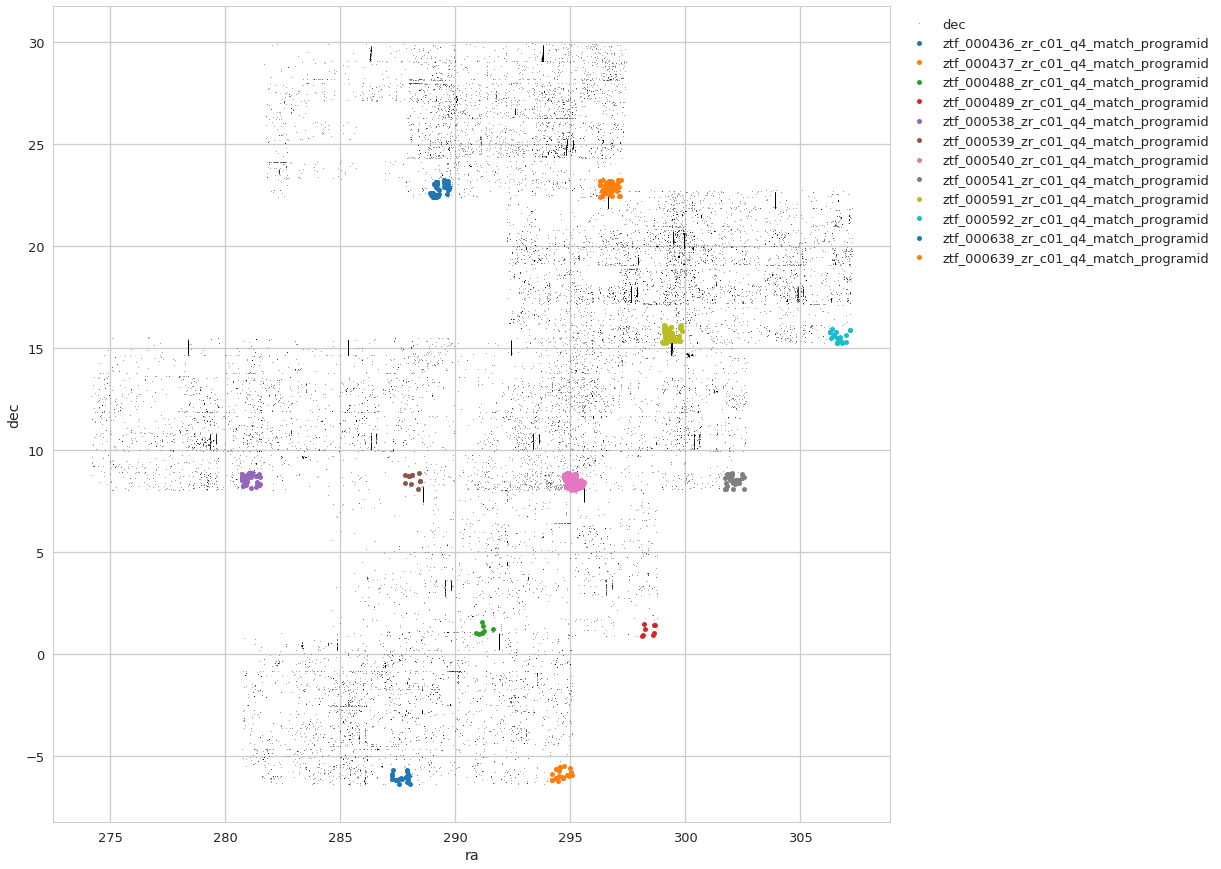

In [8]:
plt.figure(figsize=(15,15))
plt.plot(stats['ra'], stats['dec'], linestyle='none', marker='.', color='black', markersize=1)
plt.xlabel('ra')
plt.ylabel('dec')

fields = ['ztf_000436_zr_c01_q4_match_programid',
         'ztf_000437_zr_c01_q4_match_programid',
         'ztf_000488_zr_c01_q4_match_programid',
         'ztf_000489_zr_c01_q4_match_programid',
         'ztf_000538_zr_c01_q4_match_programid',
         'ztf_000539_zr_c01_q4_match_programid',
         'ztf_000540_zr_c01_q4_match_programid',
         'ztf_000541_zr_c01_q4_match_programid',
         'ztf_000591_zr_c01_q4_match_programid',
         'ztf_000592_zr_c01_q4_match_programid',
         'ztf_000638_zr_c01_q4_match_programid',
         'ztf_000639_zr_c01_q4_match_programid']

for f in fields:
    lim = stats.loc[stats['match_file'] == f]
    plt.plot(lim['ra'], lim['dec'], linestyle='none', marker='.', markersize=10, label=f)
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1))


(287.6, 288.2)

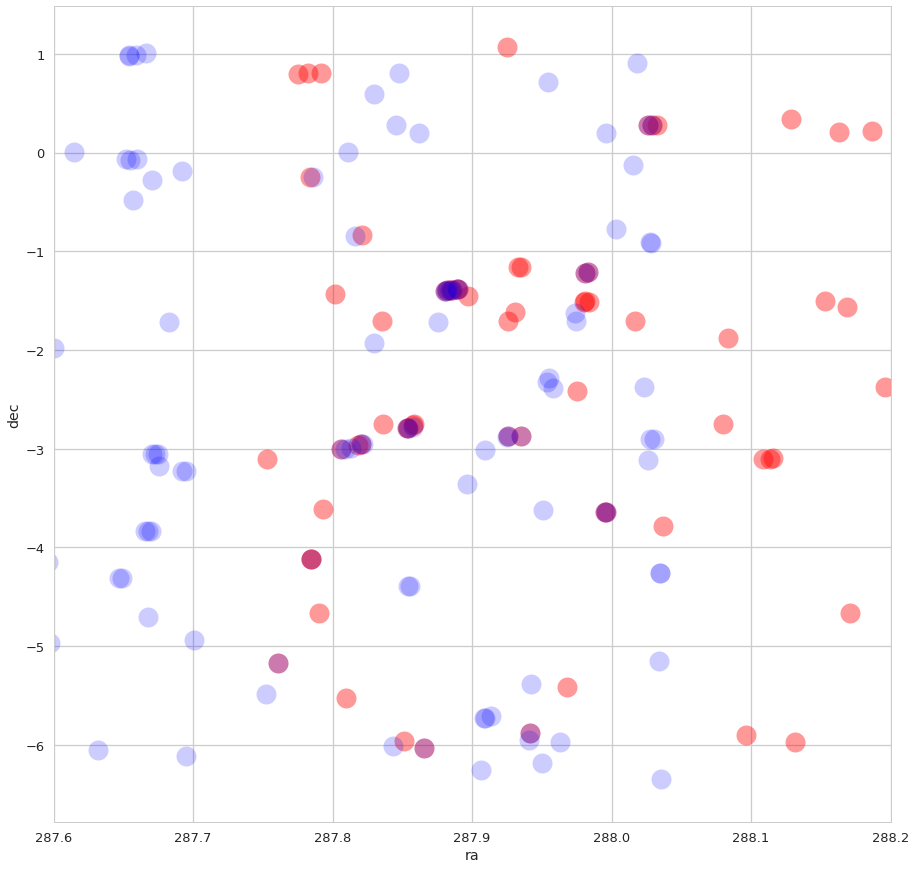

In [9]:
f436 = pd.read_csv('stats/stats_ztf_000436.csv')
f437 = pd.read_csv('stats/stats_ztf_000437.csv')
plt.figure(figsize=(15,15))
plt.plot(f437['ra'], f437['dec'], linestyle='none', marker='.', color='red', alpha=.4, markersize=40)

plt.plot(f436['ra'], f436['dec'], linestyle='none', marker='.', color='blue', alpha=.2, markersize=40)
plt.xlabel('ra')
plt.ylabel('dec')
plt.xlim(287.6, 288.2)

Text(0, 0.5, 'dec')

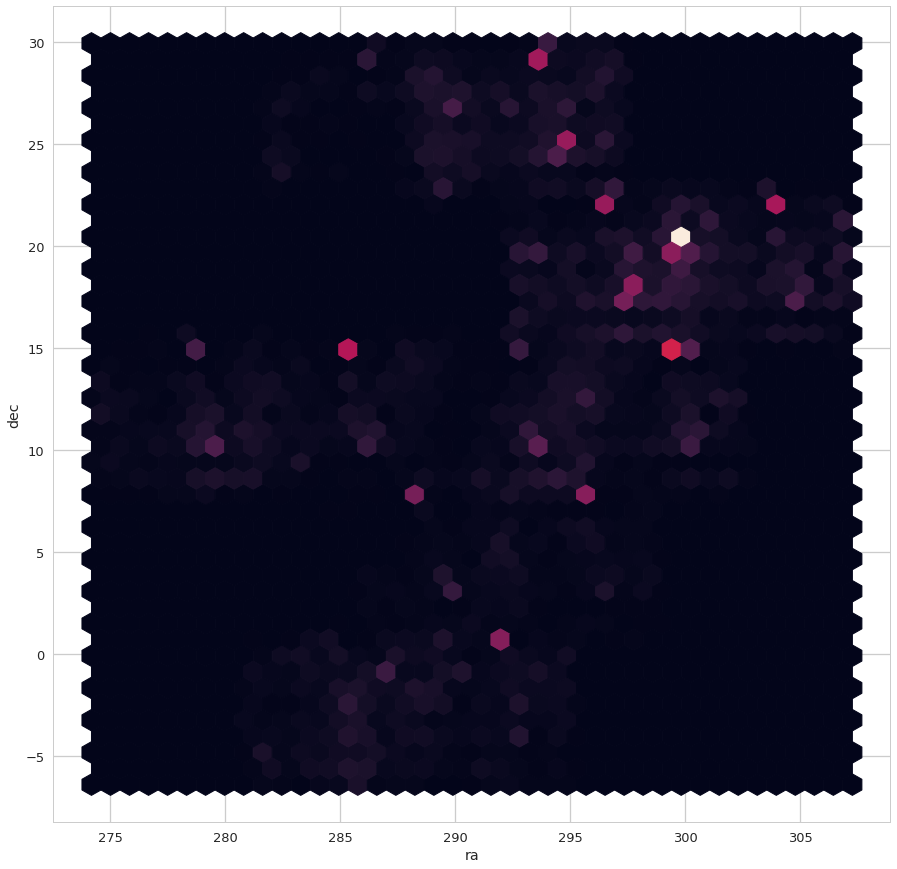

In [10]:
plt.figure(figsize=(15,15))
plt.hexbin(stats['ra'], stats['dec'], gridsize=40)
plt.xlabel('ra')
plt.ylabel('dec')

In [11]:
def veiwlimitedcurves(statscsv, path='found_flares_436/'):
    stats = pd.read_csv(statscsv)
    statslim = stats.loc[((stats["chi_flare"] <= 100) & (stats['red_flare'] + 1 < stats['red_gauss']) & 
                          ((stats["ypos"] >= 10) | (stats['ypos'] < 3075)) & 
                          ((stats['end_time'] - stats['flare_time']) > 0.01) &
                          (stats['dof_flare'] > 15))]  
    for i in range(len(statslim['id'])):
        filepath = path + statslim['match_file'].values[i] + '_id_' + str(statslim['id'].values[i]) + '*.png'
        filepath = glob.glob(filepath)
        for j in filepath:
            display(Image(filename=j))

In [12]:
ok1 = np.where(np.isfinite(gaia[u'parallax']) & 
              (gaia[u'parallax_error'] / gaia[u'parallax'] < 0.2) & np.isfinite(gaia[u'bp_rp']) & 
              (gaia[u'phot_bp_mean_flux_error']/gaia[u'phot_bp_mean_flux'] < 0.2) & 
              (gaia[u'phot_rp_mean_flux_error']/gaia[u'phot_rp_mean_flux'] < 0.2) & 
              (gaia[u'phot_g_mean_flux_error']/gaia[u'phot_g_mean_flux'] < 0.2))[0]

In [17]:
#  MIST isochrones
Mnames = ('EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'log_Teff', 
          'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'Bessell_U', 'Bessell_B', 'Bessell_V', 
          'Bessell_R', 'Bessell_I', '2MASS_J', '2MASS_H', '2MASS_Ks', 'Kepler_Kp', 'Kepler_D51', 
          'Hipparcos_Hp', 'Tycho_B', 'Tycho_V', 'Gaia_G_DR2Rev', 'Gaia_BP_DR2Rev', 
          'Gaia_RP_DR2Rev', 'TESS', 'phase')

Mfile = 'MIST_v1.1_feh_p0.25_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd'
#MIST_v1.1_feh_p0.00_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd'
mist = pd.read_table(Mfile, delim_whitespace=True, comment='#', names=Mnames)

mist_ms1 = np.where((mist['phase']==0) & 
                    (mist['log10_isochrone_age_yr'] == 9.))[0][::-1]
                    #&                     (mist['Gaia_G_DR2Rev'] > 2))

In [18]:
def LUM(gflux, plx, zp='AB', mag='G'):
    # from https://www.cosmos.esa.int/web/gaia/iow_20180316
    G0 = 25.7915509947 # AB_ZP mag

    # from Table 5.4: https://gea.esac.esa.int/archive/documentation/GDR2/Data_processing/chap_cu5pho
    #/sec_cu5pho_calibr/ssec_cu5pho_calibr_extern.html
    lp = 623.06 * u.nm # pivot wavelength of G filter

    m_G = -2.5 * np.log10(gflux) + G0
    F_AB_JY = 3631 * 10**(-0.4 * m_G)
    F_AB = F_AB_JY  * 1e-23 * u.erg/u.s/u.cm/u.cm/u.Hz

    dist = (1000./plx) * u.pc
    L = ((F_AB * dist**2) * (const.c/lp).to('Hz')).to(u.erg / u.s)
    return L.value


/epyc/opt/anaconda/lib/python3.6/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log10
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log10


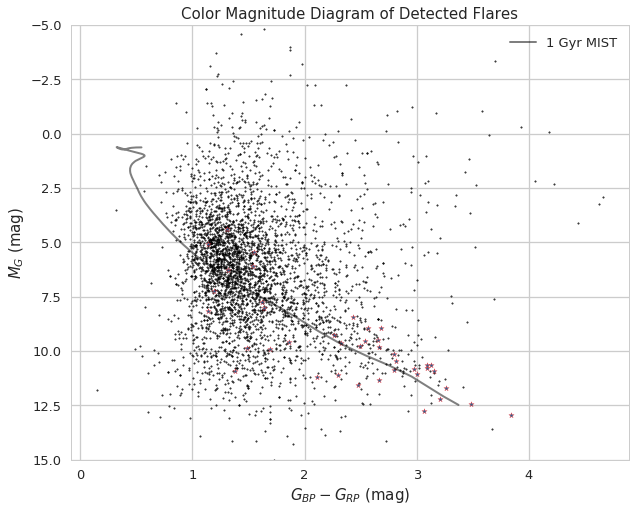

In [19]:
#And then you can call it like this:
LL = LUM(gaia['phot_g_mean_flux'][ok1].values, gaia['parallax'][ok1].values)

#And use it like this:
plt.figure(figsize=(10,8))
plt.xlabel('$G_{BP} - G_{RP}$ (mag)', size=15)
plt.title('Color Magnitude Diagram of Detected Flares', size=15)
plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
         mist['Gaia_G_DR2Rev'].values[mist_ms1], c='k', lw=2, alpha=0.5, label = '1 Gyr MIST')
#plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
#         mist['Gaia_G_DR2Rev'].values[mist_ms1] - 0.7526, c='k', lw=2, alpha=0.5, linestyle='--')
plt.ylabel('$M_G$ (mag)', size=15)
#plt.ylim(15,4.5)



plt.scatter(gaia['bp_rp'][ok1], gaia['phot_g_mean_mag'][ok1] - 5. * np.log10(1000./gaia[u'parallax'][ok1]) + 5, 
            alpha=0.75, s=10, label=None, marker='.', color='k')

plt.scatter(gaialim['bp_rp'][ok1], gaialim['phot_g_mean_mag'][ok1] - 5. * np.log10(1000./gaialim[u'parallax'][ok1]) + 5, 
            alpha=0.75, s=30, edgecolors='red', label=None, marker='*')

plt.ylim(15,-5)

plt.legend()

/epyc/opt/anaconda/lib/python3.6/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


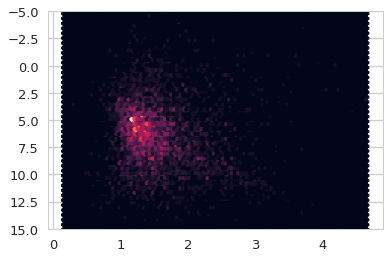

In [20]:
plt.ylim(15,-5)

plt.hexbin(gaia['bp_rp'][ok1], gaia['phot_g_mean_mag'][ok1] - 5. * np.log10(1000./gaia[u'parallax'][ok1]) + 5)

## Full Gaia

In [102]:
#Reading in 
df_xmatch436 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_436.h5','table')
df_xmatch437 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_437.h5','table')
df_xmatch488 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_488.h5','table')
df_xmatch489 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_489.h5','table')
df_xmatch538 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_538.h5','table')
df_xmatch539 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_539.h5','table')
df_xmatch540 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_540.h5','table')
df_xmatch541 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_541.h5','table')
df_xmatch591 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_591.h5','table')
df_xmatch592 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_592.h5','table')
df_xmatch638 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_638.h5','table')
df_xmatch639 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_639.h5','table')
df_xmatch685 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_685.h5','table')
df_xmatch686 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_686.h5','table')

In [103]:
df2_xmatch436 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/prv_gaia_match/gaia_match_436.h5','table')
df2_xmatch437 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/prv_gaia_match/gaia_match_437.h5','table')
df2_xmatch488 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/prv_gaia_match/gaia_match_488.h5','table')
df2_xmatch489 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/prv_gaia_match/gaia_match_489.h5','table')
df2_xmatch538 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/prv_gaia_match/gaia_match_538.h5','table')
df2_xmatch539 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/prv_gaia_match/gaia_match_539.h5','table')
df2_xmatch540 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/prv_gaia_match/gaia_match_540.h5','table')
df2_xmatch541 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/prv_gaia_match/gaia_match_541.h5','table')
df2_xmatch591 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/prv_gaia_match/gaia_match_591.h5','table')
df2_xmatch592 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/prv_gaia_match/gaia_match_592.h5','table')
df2_xmatch638 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/prv_gaia_match/gaia_match_638.h5','table')
df2_xmatch639 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/prv_gaia_match/gaia_match_639.h5','table')
df2_xmatch685 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/prv_gaia_match/gaia_match_685.h5','table')
df2_xmatch686 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/prv_gaia_match/gaia_match_686.h5','table')

In [104]:
xmatch = [df_xmatch436, df_xmatch437, df_xmatch488, df_xmatch489, df_xmatch538, df_xmatch539, df_xmatch540, 
          df_xmatch541, df_xmatch591, df_xmatch592, df_xmatch638, df_xmatch639, df_xmatch685, df_xmatch686]

In [105]:
xmatch2 = [df2_xmatch436, df2_xmatch437, df2_xmatch488, df2_xmatch489, df2_xmatch538, df2_xmatch539, df2_xmatch540, 
          df2_xmatch541, df2_xmatch591, df2_xmatch592, df2_xmatch638, df2_xmatch639, df2_xmatch685, df2_xmatch686]

In [106]:
df_xmatch = pd.DataFrame()
for i in xmatch:
    df_xmatch = df_xmatch.append(i)

In [107]:
df2_xmatch = pd.DataFrame()
for i in xmatch2:
    df2_xmatch = df2_xmatch.append(i)

In [25]:
df_xmatch.dtypes

matchid                             int64
ra                                float64
dec                               float64
source_id                           int64
bp_rp                             float64
phot_g_mean_mag                   float64
phot_g_mean_flux_over_error       float64
parallax                          float64
parallax_error                    float64
axsdist                           float64
exploded_unique_matchids_index      int64
unique_matchids_exploded          float64
dtype: object

In [111]:
df2_xmatch.dtypes

bp_rp                             float64
phot_g_mean_mag                   float64
phot_g_mean_flux_over_error       float64
parallax                          float64
parallax_error                    float64
exploded_unique_matchids_index      int64
unique_matchids_exploded            int64
dtype: object

In [100]:
df_xmatch['unique_matchids_exploded'].astype(int).head()

0    436122210002755
1    436122210001820
2    436122210000475
3    436122210013655
4    436122210004712
Name: unique_matchids_exploded, dtype: int64

In [109]:
df2_xmatch['unique_matchids_exploded'] = df2_xmatch['unique_matchids_exploded'].astype(int)

In [162]:
#df_xmatch = df_xmatch.set_index('unique_matchids_exploded')

In [163]:
#df_xmatch.loc[df_xmatch['exploded_unique_matchids_index'] > 0]

/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  
/epyc/opt/anaconda/lib/python3.6/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


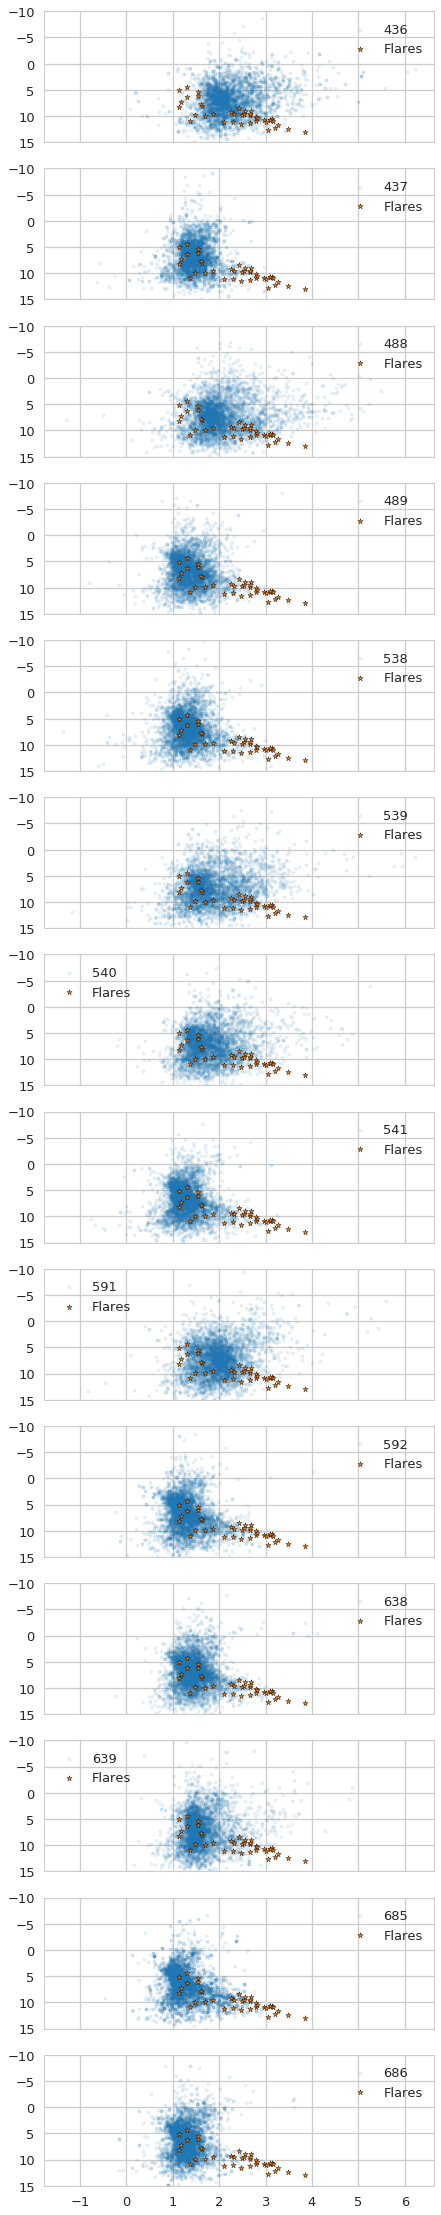

In [28]:
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14) = plt.subplots(14, sharex=True, sharey=True, figsize=(7, 40))

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14]

xmatch_label = ['436', '437', '488', '489', '538', '539', '540', 
                '541', '591', '592', '638', '639', '685', '686']

xmatch = [df_xmatch436, df_xmatch437, df_xmatch488, df_xmatch489, df_xmatch538, df_xmatch539, df_xmatch540, 
          df_xmatch541, df_xmatch591, df_xmatch592, df_xmatch638, df_xmatch639, df_xmatch685, df_xmatch686]

for x,label,ax in zip(xmatch, xmatch_label,axes):
    LL = LUM(x['phot_g_mean_mag'][ok1].values, x['parallax'][ok1].values)
    ax.set_ylim(15,-10)
    ax.scatter(x['bp_rp'][ok1], x['phot_g_mean_mag'][ok1] - 5. * np.log10(1000./x[u'parallax'][ok1]) + 5, 
                alpha=0.1, s=10, label=label)
    ax.scatter(gaialim['bp_rp'][ok1], gaialim['phot_g_mean_mag'][ok1] - 5. * np.log10(1000./gaialim[u'parallax'][ok1]) + 5, 
               alpha=1, s=30, edgecolors='black', label='Flares', marker='*')
    ax.legend()



/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log10
/epyc/opt/anaconda/lib/python3.6/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log10
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log10


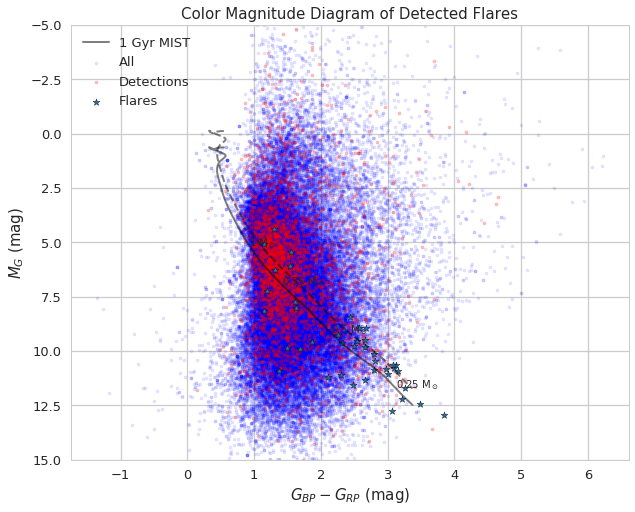

In [29]:
# Compare to CMD Fig 1. https://arxiv.org/pdf/1804.09378.pdf

#And then you can call it like this:
LL = LUM(df_xmatch['phot_g_mean_mag'][ok1].values, df_xmatch['parallax'][ok1].values)

#And use it like this:
plt.figure(figsize=(10,8))
plt.xlabel('$G_{BP} - G_{RP}$ (mag)', size=15)
plt.title('Color Magnitude Diagram of Detected Flares', size=15)
plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
         mist['Gaia_G_DR2Rev'].values[mist_ms1], c='k', lw=2, alpha=0.5, label = '1 Gyr MIST')
plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
         mist['Gaia_G_DR2Rev'].values[mist_ms1] - 0.7526, c='k', lw=2, alpha=0.5, linestyle='--')
plt.ylabel('$M_G$ (mag)', size=15)
plt.text(0.93, 5.18, '1 M$_\odot$', fontsize=10)
plt.text(1.42, 6.98, '0.75 M$_\odot$', fontsize=10)
plt.text(2.15, 9.18, '0.5 M$_\odot$', fontsize=10)
plt.text(3.12, 11.7, '0.25 M$_\odot$', fontsize=10)


plt.scatter(df_xmatch['bp_rp'][ok1], df_xmatch['phot_g_mean_mag'][ok1] - 5. * np.log10(1000./df_xmatch[u'parallax'][ok1]) + 5, 
            alpha=0.1, s=10, color='blue', label='All')

plt.scatter(gaia['bp_rp'][ok1], gaia['phot_g_mean_mag'][ok1] - 5. * np.log10(1000./gaia[u'parallax'][ok1]) + 5, 
            alpha=0.25, s=10, label='Detections', color='red')

plt.scatter(gaialim['bp_rp'][ok1], gaialim['phot_g_mean_mag'][ok1] - 5. * np.log10(1000./gaialim[u'parallax'][ok1]) + 5, 
            alpha=1, s=50, edgecolors='black', label='Flares', marker='*')

plt.ylim(15,-5)

plt.legend()

## Working Through Understanding Duplications in XMatch

#### Duplicated ZTF Sources

Every source found in a CCD is given a different Matchid. Each CCD and filter will assign different numbers to its detected sources. The fields and CCDs overlap sources which cause different Matchids being assigned to the same sources. AXS assigns a unique_matchids_exploded which enables each source to have a unique ID even if seen in a different image with a different matchid. The exploded_unique_matchids_index shows how many sources with a matchid are actually the same source. 

This graph shows the distribution of the exploded_unique_matchids_index. This shows the distribution of double counting ZTF sources. 

(0, 10)

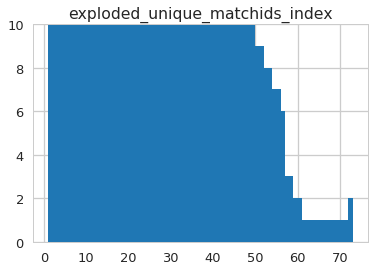

In [56]:
index = df_xmatch.loc[df_xmatch['exploded_unique_matchids_index'].astype(int)> 0]
plt.title('exploded_unique_matchids_index')
plt.hist(index['exploded_unique_matchids_index'].astype(int), bins=72)
plt.ylim(0,10)

#### Repeated Unique Match IDs in the dataframe


Every time a unique match id is repeated in the list, it indicates that there were multiple Gaia sources that it was matched with. The XMatch collected any Gaia source within 1 arcsec.

In [31]:
duplicates_xmatch = df_xmatch.pivot_table(index =['unique_matchids_exploded'], aggfunc='size')

(0, 100)

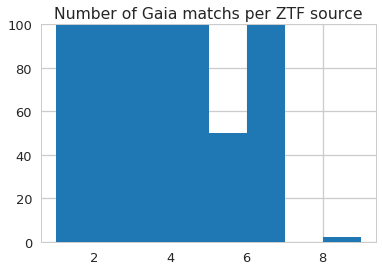

In [59]:
plt.hist(duplicates_xmatch.values, bins=8)
plt.title('Number of Gaia matchs per ZTF source')
plt.ylim(0,100)

In [63]:
max(duplicates_xmatch.values)
duplicates_xmatch.loc[duplicates_xmatch.values == 9]

unique_matchids_exploded
437162210009879    9
437162210013619    9
dtype: int64

In [64]:
#this shows a wierd pattern of finding the same Gaia source for the same source but it is repeating.
df_xmatch.loc[df_xmatch['unique_matchids_exploded'] == 437162210009879]

,matchid,ra,dec,source_id,bp_rp,phot_g_mean_mag,phot_g_mean_flux_over_error,parallax,parallax_error,axsdist,exploded_unique_matchids_index,unique_matchids_exploded
3033132,437162210025983,288.019418,0.919842,4264334459720270464,NaN,20.140114,58.195255,NaN,NaN,0.000002,1,437162210009879
3033147,488034210016776,288.019431,0.920067,4264334455384899456,1.469725,18.466566,349.164703,0.12176,0.307366,0.000004,4,437162210009879
3033151,488034210046788,288.019474,0.920252,4264334455384899456,1.469725,18.466566,349.164703,0.12176,0.307366,0.000005,3,437162210009879
1938783,437162210025983,288.019418,0.919842,4264334459720270464,NaN,20.140114,58.195255,NaN,NaN,0.000002,1,437162210009879
1938798,488034210016776,288.019431,0.920067,4264334455384899456,1.469725,18.466566,349.164703,0.12176,0.307366,0.000004,4,437162210009879
1938802,488034210046788,288.019474,0.920252,4264334455384899456,1.469725,18.466566,349.164703,0.12176,0.307366,0.000005,3,437162210009879
2449316,437162210025983,288.019418,0.919842,4264334459720270464,NaN,20.140114,58.195255,NaN,NaN,0.000002,1,437162210009879
2449331,488034210016776,288.019431,0.920067,4264334455384899456,1.469725,18.466566,349.164703,0.12176,0.307366,0.000004,4,437162210009879
2449335,488034210046788,288.019474,0.920252,4264334455384899456,1.469725,18.466566,349.164703,0.12176,0.307366,0.000005,3,437162210009879


In [112]:
duplicates_id_id = df_xmatch.pivot_table(index = ['matchid','unique_matchids_exploded'], aggfunc='size')

The unique id has been applied to all of the sources at this point. I have appended the df for each field into one large xmatch df. Because each field df has the Gaia info for each source in the field, when I appended all of the field df, if a source was in multiple fields, the source and its Gaia information will be duplicated in the large df.

(array([6.7241609e+07, 8.8003470e+06, 4.8269900e+05, 9.7800000e+02,
        9.9000000e+01]),
 array([1., 2., 3., 4., 5., 6.]),
 <a list of 5 Patch objects>)

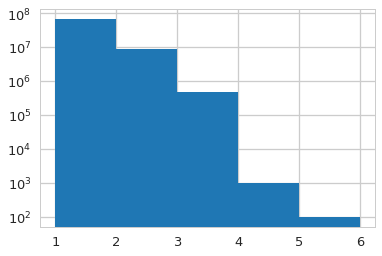

In [113]:
plt.hist(duplicates_id_id.values,bins=5, log=True)

In [114]:
#Take out double counting the same source and gaia match
nodupid_df_xmatch = df_xmatch.drop_duplicates(['matchid','unique_matchids_exploded'])

In [115]:
duplicates_nodupid_df_xmatch = nodupid_df_xmatch.pivot_table(index = ['unique_matchids_exploded'], aggfunc='size')

(array([7.6475048e+07, 2.5156000e+04, 1.2400000e+02]),
 array([1, 2, 3, 4]),
 <a list of 3 Patch objects>)

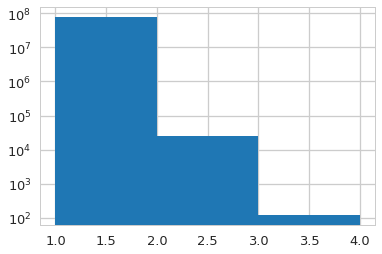

In [116]:
plt.hist(duplicates_nodupid_df_xmatch.values,bins=[1, 2, 3, 4], log=True)

### Graph Explaination:
This graph shows how many matchids are have the same unique_match_id. This is an issue because  all of the matchids shouls aready be unique.

In [117]:
duplicates_id_mag = df_xmatch.pivot_table(index = ['unique_matchids_exploded','bp_rp'], aggfunc='size')
duplicates_id_mag2 = df2_xmatch.pivot_table(index = ['unique_matchids_exploded','bp_rp'], aggfunc='size')

(array([6.2016831e+07, 8.0715160e+06, 4.5309600e+05, 4.1850000e+03,
        4.9700000e+02]),
 array([1., 2., 3., 4., 5., 6.]),
 <a list of 5 Patch objects>)

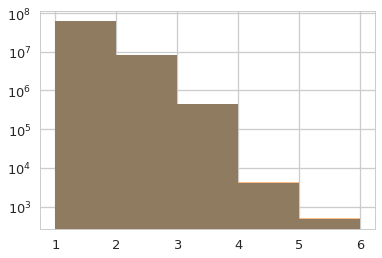

In [125]:
plt.hist(duplicates_id_mag.values, bins=5, log=True)
plt.hist(duplicates_id_mag2.values, bins=5, log=True, alpha=.5)

In [119]:
nodupmag_df_xmatch = df_xmatch.drop_duplicates(['unique_matchids_exploded','bp_rp'])
nodupmag_df2_xmatch = df2_xmatch.drop_duplicates(['unique_matchids_exploded','bp_rp'])

In [120]:
duplicates_nodupmag_df_xmatch = nodupmag_df_xmatch.pivot_table(index = ['unique_matchids_exploded'], aggfunc='size')
duplicates_nodupmag_df2_xmatch = nodupmag_df2_xmatch.pivot_table(index = ['unique_matchids_exploded'], aggfunc='size')

(array([7.3016122e+07, 2.9591880e+06, 1.0212000e+04]),
 array([1, 2, 3, 4]),
 <a list of 3 Patch objects>)

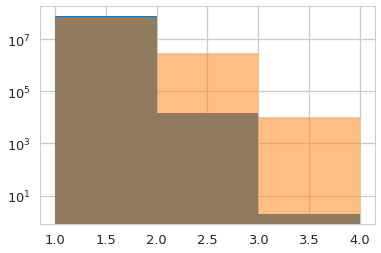

In [122]:
plt.hist(duplicates_nodupmag_df_xmatch.values,bins=[1, 2, 3, 4], log=True)
plt.hist(duplicates_nodupmag_df2_xmatch.values,bins=[1, 2, 3, 4], log=True, alpha=.5)

In [128]:
print(len(duplicates_nodupmag_df_xmatch.values)-len(duplicates_nodupmag_df2_xmatch.values))
print(len(df_xmatch.values)-len(df2_xmatch.values))

514806
-2881296


In [129]:
duplicates_idid_df_xmatch = nodupmag_df_xmatch.pivot_table(index = ['unique_matchids_exploded','matchid'], aggfunc='size')


(array([7.6496121e+07, 9.3750000e+03]),
 array([1, 2, 3]),
 <a list of 2 Patch objects>)

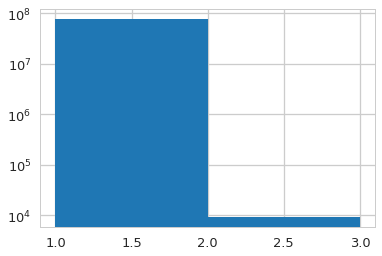

In [131]:
plt.hist(duplicates_idid_df_xmatch.values,bins=[1, 2, 3], log=True)

In [134]:
duplicates_idid_df_xmatch.loc[duplicates_idid_df_xmatch.values > 1]

unique_matchids_exploded  matchid         
386151200047228           386151200047228     2
386151200057885           386151200057885     2
386152200013830           386152200013830     2
386152200058057           386152200058057     2
386162200015264           437023210015677     2
386162200092913           437034200074425     2
386162200101127           386162200101127     2
436011200040365           437042200078178     2
436011200130429           437042210075142     2
436012200046832           436012200046832     2
436012200046843           436012200046843     2
436012200110537           436012200110537     2
436012200143688           436012200143688     2
436012200154787           436012200154787     2
436013200081401           436013200081401     2
436013200108735           436013200108735     2
436013200139053           436013200139053     2
436013200141824           436013200141824     2
436014200037368           436014200037368     2
436014200102793           436014200102793    

In [135]:
df_xmatch.loc[df_xmatch['unique_matchids_exploded'] == 386151200047228]

,matchid,ra,dec,source_id,bp_rp,phot_g_mean_mag,phot_g_mean_flux_over_error,parallax,parallax_error,axsdist,exploded_unique_matchids_index,unique_matchids_exploded
2636370,386151200047228,293.945189,-6.416472,4207456482647511552,NaN,19.047892,288.864136,NaN,NaN,0.000004,0,386151200047228
4568516,386151200047228,293.945189,-6.416472,4207456482652862336,1.226835,18.251677,268.305634,2.467577,0.352746,0.000002,0,386151200047228


In [ ]:
df_xmatch436
df_xmatch437
df_xmatch488
df_xmatch489
df_xmatch538
df_xmatch539
df_xmatch540
df_xmatch541
df_xmatch591
df_xmatch592
df_xmatch638
df_xmatch639
df_xmatch685
df_xmatch686

### Graph Explaination:

There were two rounds of ZTF and Gaia xmatching. The first round, listed above with the df2, matched each ztf source to any gaia source within 1 arcsec. The second round, listed above with the df, matched each ZTF source to the closest Gaia source, so it is 1-1. However, there are 514806 more sources in the new list that should have left out the duplicates. 





In [45]:
df_xmatch.loc[df_xmatch['unique_matchids_exploded'] == 489162210044013]

,matchid,ra,dec,source_id,bp_rp,phot_g_mean_mag,phot_g_mean_flux_over_error,parallax,parallax_error,axsdist,exploded_unique_matchids_index,unique_matchids_exploded
1255627,489162200187585,291.461852,8.122449,4296223148757620736,1.205929,17.636925,863.060303,-0.017046,0.134103,0.000002,3,489162210044013
1255629,540034210068202,291.461853,8.122444,4296223148757620736,1.205929,17.636925,863.060303,-0.017046,0.134103,0.000002,1,489162210044013
994385,489162200187585,291.461852,8.122449,4296223148757620736,1.205929,17.636925,863.060303,-0.017046,0.134103,0.000002,3,489162210044013
994387,540034210068202,291.461853,8.122444,4296223148757620736,1.205929,17.636925,863.060303,-0.017046,0.134103,0.000002,1,489162210044013
1867085,489162200187585,291.461852,8.122449,4296223148757620736,1.205929,17.636925,863.060303,-0.017046,0.134103,0.000002,3,489162210044013
1867087,540034210068202,291.461853,8.122444,4296223148757620736,1.205929,17.636925,863.060303,-0.017046,0.134103,0.000002,1,489162210044013


In [46]:
nodup_df_xmatch.loc[nodup_df_xmatch['unique_matchids_exploded'] == 489162210044013]

,matchid,ra,dec,source_id,bp_rp,phot_g_mean_mag,phot_g_mean_flux_over_error,parallax,parallax_error,axsdist,exploded_unique_matchids_index,unique_matchids_exploded
1255627,489162200187585,291.461852,8.122449,4296223148757620736,1.205929,17.636925,863.060303,-0.017046,0.134103,0.000002,3,489162210044013


#### Figure best way to pick best Gaia match

In [47]:
nodup_gaia = gaia.drop_duplicates(['match_file', 'id','phot_g_mean_mag'])
duplicates_gaia = nodup_gaia.pivot_table(index =['match_file', 'id'], aggfunc='size')
duplicates_gaia = duplicates_gaia.loc[duplicates_gaia.values > 1]
duplicates_gaia



match_file                            id    
ztf_000436_zr_c01_q1_match_programid  34396     2
ztf_000436_zr_c01_q2_match_programid  120419    2
                                      157755    2
ztf_000436_zr_c01_q4_match_programid  20873     2
                                      159977    2
ztf_000436_zr_c02_q1_match_programid  119026    2
                                      173681    2
ztf_000436_zr_c02_q2_match_programid  94267     2
                                      117555    2
ztf_000436_zr_c02_q3_match_programid  18873     2
                                      63895     2
                                      109483    2
                                      122492    2
                                      187249    2
ztf_000436_zr_c02_q4_match_programid  137013    2
                                      137469    2
                                      167159    2
                                      195251    2
ztf_000436_zr_c03_q1_match_programid  11527     2
     

In [48]:
dup_test = gaia.loc[(gaia['match_file'] == 'ztf_000592_zr_c12_q2_match_programid') &
                    (gaia['id'] == 3359)]


In [49]:
dup_test

,angDist,match_file,id,aic_flare,chi_flare,dof_flare,red_flare,aic_gauss,chi_gauss,dof_gauss,...,phot_rp_mean_mag,bp_rp,radial_velocity,radial_velocity_error,rv_nb_transits,teff_val,a_g_val,e_bp_min_rp_val,radius_val,lum_val
2456,0.076694,ztf_000592_zr_c12_q2_match_programid,3359,94.100021,86.100021,66,1.30455,57.518228,49.518228,66,...,18.340961,1.122461,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2457,0.076694,ztf_000592_zr_c12_q2_match_programid,3359,94.100021,86.100021,66,1.30455,57.518228,49.518228,66,...,18.340961,1.122461,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2458,0.076694,ztf_000592_zr_c12_q2_match_programid,3359,94.100021,86.100021,66,1.30455,57.518228,49.518228,66,...,18.340961,1.122461,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [50]:
pd.set_option('display.max_columns', None)
dup_test.head

<bound method NDFrame.head of        angDist                            match_file    id  aic_flare  \
2456  0.076694  ztf_000592_zr_c12_q2_match_programid  3359  94.100021   
2457  0.076694  ztf_000592_zr_c12_q2_match_programid  3359  94.100021   
2458  0.076694  ztf_000592_zr_c12_q2_match_programid  3359  94.100021   

      chi_flare  dof_flare red_flare  aic_gauss  chi_gauss  dof_gauss  \
2456  86.100021         66   1.30455  57.518228  49.518228         66   
2457  86.100021         66   1.30455  57.518228  49.518228         66   
2458  86.100021         66   1.30455  57.518228  49.518228         66   

     red_gauss               exp_comp  perc_comp                 fl_indx  \
2456  0.750276  1.1385823878800448E-8 -36.581794  [77 78 79 80 81 82 83]   
2457  0.750276  1.1385823878800448E-8 -36.581794  [77 78 79 80 81 82 83]   
2458  0.750276  1.1385823878800448E-8 -36.581794  [77 78 79 80 81 82 83]   

        equivdur          ra        dec      xpos      ypos    flare_time  \
24

In [51]:
# File with several Gaia matchs per ztf sources
sources, sourcedata, transients, transientdata = mf.loaddata('../epyc/data/ztf_matchfiles/partnership/ztfweb.ipac.caltech.edu/rc53/fr000601-000650/ztf_000639_zr_c14_q2_match_programid2.pytable')

In [52]:
#ids with multiple gaia:
ids = [319,980,1075, 1221,1806,12125,16088,18773,20074,25692,35014,62107,63050,92591,99664,114607,130076,171211]

id_test = 171211

gaia_info = gaia.loc[(gaia['match_file'] == 'ztf_000639_zr_c14_q2_match_programid') &
                     (gaia['id'] == id_test)]

lc = sourcedata[sourcedata["matchid"] == id_test]



In [53]:
def test_gaia(gaia,ztf): 
    '''
    If mag > 0 it favors 1, if mag < 0 it favors 0
    If dist > 0 it favors 1, if dist < 0 it favors 0
    '''
    mag = gaia['phot_g_mean_mag'] - np.mean(ztf['psfmag'])
    dist0 = ((gaia['ra_epoch2000'].values[0] - np.mean(ztf['ra'])) ** 2 +
             (gaia['dec_epoch2000'].values[0] - np.mean(ztf['dec'])) ** 2 ) ** .5 
    dist1 = ((gaia['ra_epoch2000'].values[1] - np.mean(ztf['ra'])) ** 2 +
             (gaia['dec_epoch2000'].values[1] - np.mean(ztf['dec'])) ** 2 ) ** .5 
    return [np.abs(mag.values[0]) - np.abs(mag.values[1]), dist0 - dist1]


(-0.0003, 0.0003)

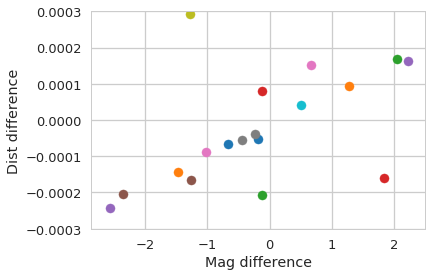

In [54]:
for i in ids:
    gaia_info = gaia.loc[(gaia['match_file'] == 'ztf_000639_zr_c14_q2_match_programid') &
                         (gaia['id'] == i)]
    lc = sourcedata[sourcedata["matchid"] == i]
    plt.scatter(test_gaia(gaia_info, lc)[0],test_gaia(gaia_info, lc)[1])
plt.xlabel('Mag difference')
plt.ylabel('Dist difference')

plt.ylim(-.0003, .0003)

### Graph Explaination:
When cross matching ZTF and Gaia, more than one Gaia can be within 1 acrsec of the ZTF source. This graph shows if there is any difference between using proximity or luminosity to determine which Gaia source matches the ZTF source. Being negative in either distance or magnitude shows it favors source 1, being positive in either shows it favors source 2. It tends to prefer the same source using a both comparisons. To ensure there is a one to one match of Gaia to ZTF sources, we had AXS chose the source that was closest. Using proximity was much simpliar to use than their luminosity.

## Important Points

* The index values repeat because the index is from the dataframe of each field. 
* fdf